In [1]:
import bambi as bmb

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
data = bmb.load_data("my_data")

In [4]:
formula = bmb.Formula("y ~ x")
priors = {"x": bmb.Prior("Normal", mu=0, sigma=1)}
model = bmb.Model(formula, data, priors=priors)
model.build()

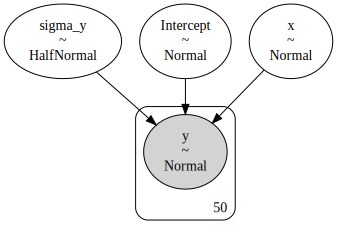

In [5]:
model.graph()

In [10]:
idata = model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_y, Intercept, x]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.


In [11]:
idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [12]:
formula = bmb.Formula("y ~ x", "sigma ~ x")
model = bmb.Model(formula, data)
model.build()

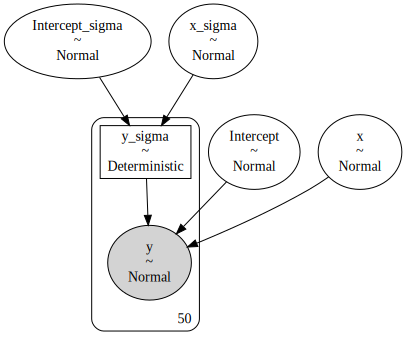

In [13]:
model.graph()

In [14]:
idata = model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Intercept, x, Intercept_sigma, x_sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.


ValueError: ('chain', 'draw') must be a permuted list of Frozen({'chain': 2, 'draw': 1000, 'y_sigma_dim_0': 50}), unless `...` is included

**TODO** Add dim for the observations. We need them in distributional models. And perhaps, they're also needed in regular models as well.

**TODO**

Verificar que tenemos los SUPPORTED_LINKS para cada parametro (no todos deben tolerar todo)